# Détection des faux Billets

Ce projet a pour but de créer un algorithme de détection de faux billets et revoir des notions vues aux épisodes précédents.

Le [jeu de données](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/notes.csv)  contenant les caractéristiques géométriques de billets de banque. Pour chacun d'eux, nous connaissons :

 - la longueur du billet (en mm) ;  
 - la hauteur du billet (mesurée sur le côté gauche, en mm) ;  
 - La hauteur du billet (mesurée sur le côté droit, en mm) ;  
 - la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;  
 - la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;  
 - la diagonale du billet (en mm).

L'étude va consister en 3 parties : 

Partie 1 : analyse exploratoire univariée et bivariée de votre jeu de données  

Partie 2 : ACP 
    Vous réaliserez une analyse en composantes principales de l'échantillon, en suivant toutes ces étapes :  
        - choix du nombre des composantes
        - représentation des variables par le cercle des corrélations 
        - représentation des individus par les plans factoriels 
        - analyser de la qualité de représentation et la contribution des individus.
Pour chacune de ces étapes, commentez les résultats obtenus. La variable donnant la nature Vrai/Faux du billet sera utilisée comme variable illustrative.

Partie 3 : Réaliser une classification des billets (révisions de kmeans ou régression logique, et aller creuser côté CAH)

In [2]:
# Import des librairies
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
#classe pour l'ACP
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

#RegLog Kmeans
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

#CAH
from scipy.cluster.hierarchy import dendrogram

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import add_constant
from statsmodels.api import Logit

## Data Acquisition

### Load dataset

In [3]:
cash_df = pd.read_csv('../data/notes.csv')

In [4]:
cash_df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [5]:
cash_df.tail()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87
169,False,171.96,104.00,103.95,5.63,3.26,110.96


### High level statistics

In [6]:
cash_df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


In [7]:
cash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


In [8]:
cash_df.is_genuine.value_counts()

True     100
False     70
Name: is_genuine, dtype: int64

### Observations

Il n'y aucune valeure manquantes sur un total de 170 instances de données.

Cent de ces billets sont classé comme étant des vrais, alors que les restants 70 étant que des faux.

## Partie 1

## Univariate Analysis

Rapport billets vrai/faux

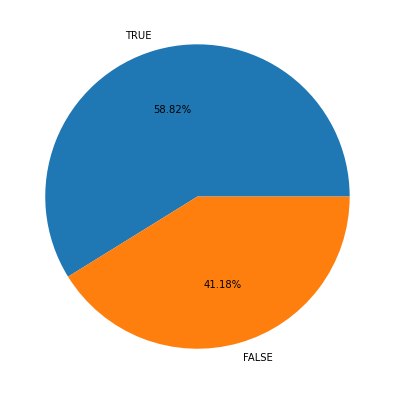

In [9]:
plt.figure(figsize=(10,7))
plt.pie(cash_df.is_genuine.value_counts(), labels=('TRUE','FALSE'), autopct='%0.02f%%')
plt.show()

## Bivariate Analysis

Les distributions de longueurs, largeurs des billets de votre dataset

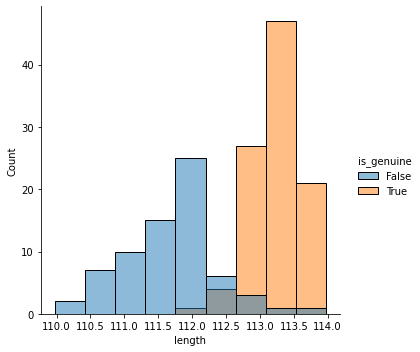

In [10]:
sns.displot(x=cash_df.length, hue=cash_df.is_genuine)

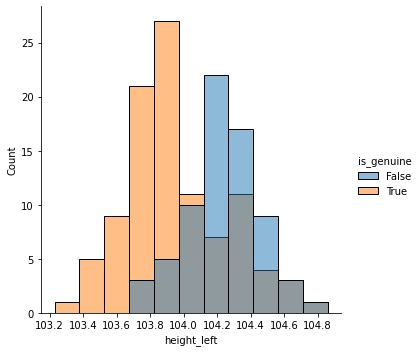

In [11]:
sns.displot(x=cash_df.height_left, hue=cash_df.is_genuine)

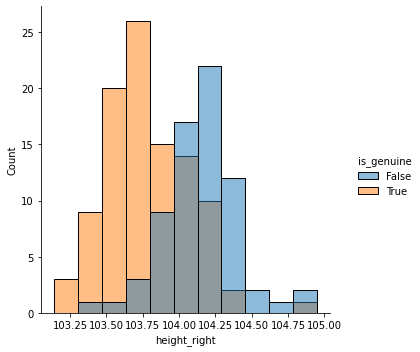

In [12]:
sns.displot(x=cash_df.height_right, hue=cash_df.is_genuine)

Distribution diagonale du billet vrai vs faux

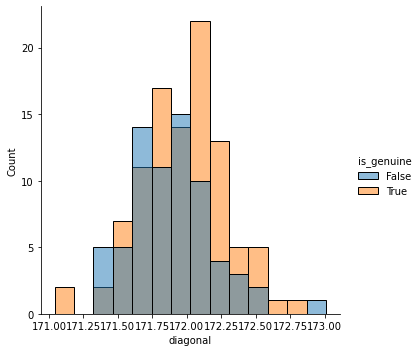

In [13]:
sns.displot(x=cash_df.diagonal, hue=cash_df.is_genuine)

Rapport longueur/largeur billets vrais vs faux

<AxesSubplot:xlabel='height_right', ylabel='length'>

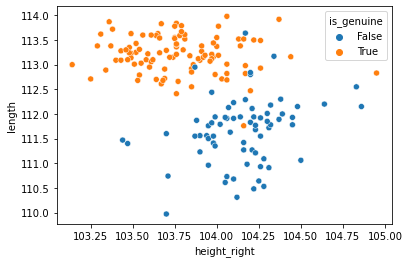

In [14]:
sns.scatterplot(x=cash_df.height_right, y=cash_df.length, hue=cash_df.is_genuine)

<AxesSubplot:xlabel='height_left', ylabel='length'>

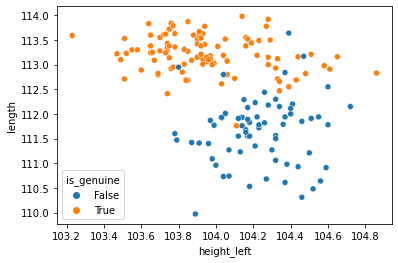

In [15]:
sns.scatterplot(x=cash_df.height_left, y=cash_df.length, hue=cash_df.is_genuine)

Rapport longueur/diagonal billet vrai/faux

<AxesSubplot:xlabel='length', ylabel='diagonal'>

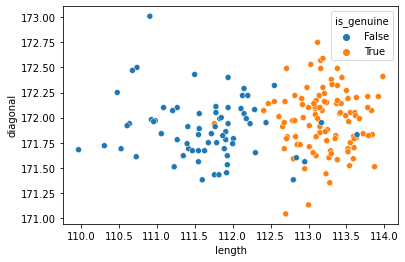

In [16]:
sns.scatterplot(x=cash_df.length, y=cash_df.diagonal, hue=cash_df.is_genuine)

Rapport hauteur/diagonal billet vrai/faux

<AxesSubplot:xlabel='height_left', ylabel='diagonal'>

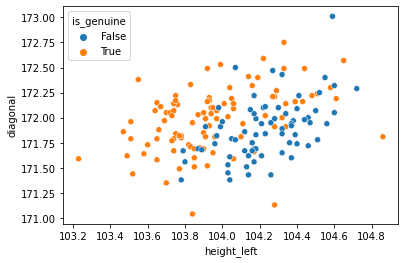

In [17]:
sns.scatterplot(x=cash_df.height_left, y=cash_df.diagonal, hue=cash_df.is_genuine)

<AxesSubplot:xlabel='height_right', ylabel='diagonal'>

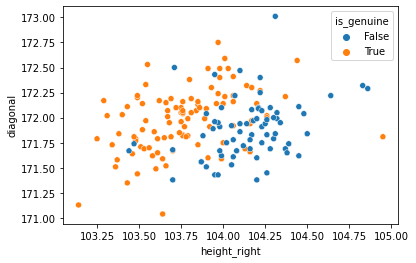

In [18]:
sns.scatterplot(x=cash_df.height_right, y=cash_df.diagonal, hue=cash_df.is_genuine)

### Observations

A partir d'environ 113mm, plus la longueur augmente plus les billets tendent à étre classé comme étant des faux et viceversa, moins ils sont longues, plus ils tenderont à étre classé comme étant de vrais.

A partir d'environ 104 mm, que soit mesurée sur le côté gauche ou droit du billet, plus l'hauteur (épaisseur) du billet augmente et plus les billets sont classés comme étant de faux et viceversa, moins ils sont épais plus ils sont classés comme étant des vrais.

Distribution des classes en prenant la diagonal comme feature principale, pas du tout nette / évidente

La repartion (classification) entre les billets vrais/faux semble étre assez evidente en correlant la largeur et la longueur du billet, qu'ils aient été mesurée sur le coté gauche ou droite, ce qui veut dire qu'il y a une correlation entre ces deux features.

La repartion (classification) entre les billets vrais/faux semble étre assez pertinente en correlant la diagonal et la longueur du billet, ce qui veut dire qu'il y a une correlation entre ces deux features.

La repartion (classification) entre les billets vrais/faux en correlant la diagonal et l'hauteur du billet, qu'ils aient été mesurée sur le coté gauche ou droite par contre ne semble pas l'étre, ce qui veut dire qu'il y a peu de correlation entre ces deux features.

## Multivariate Analysis

#### Pair plot

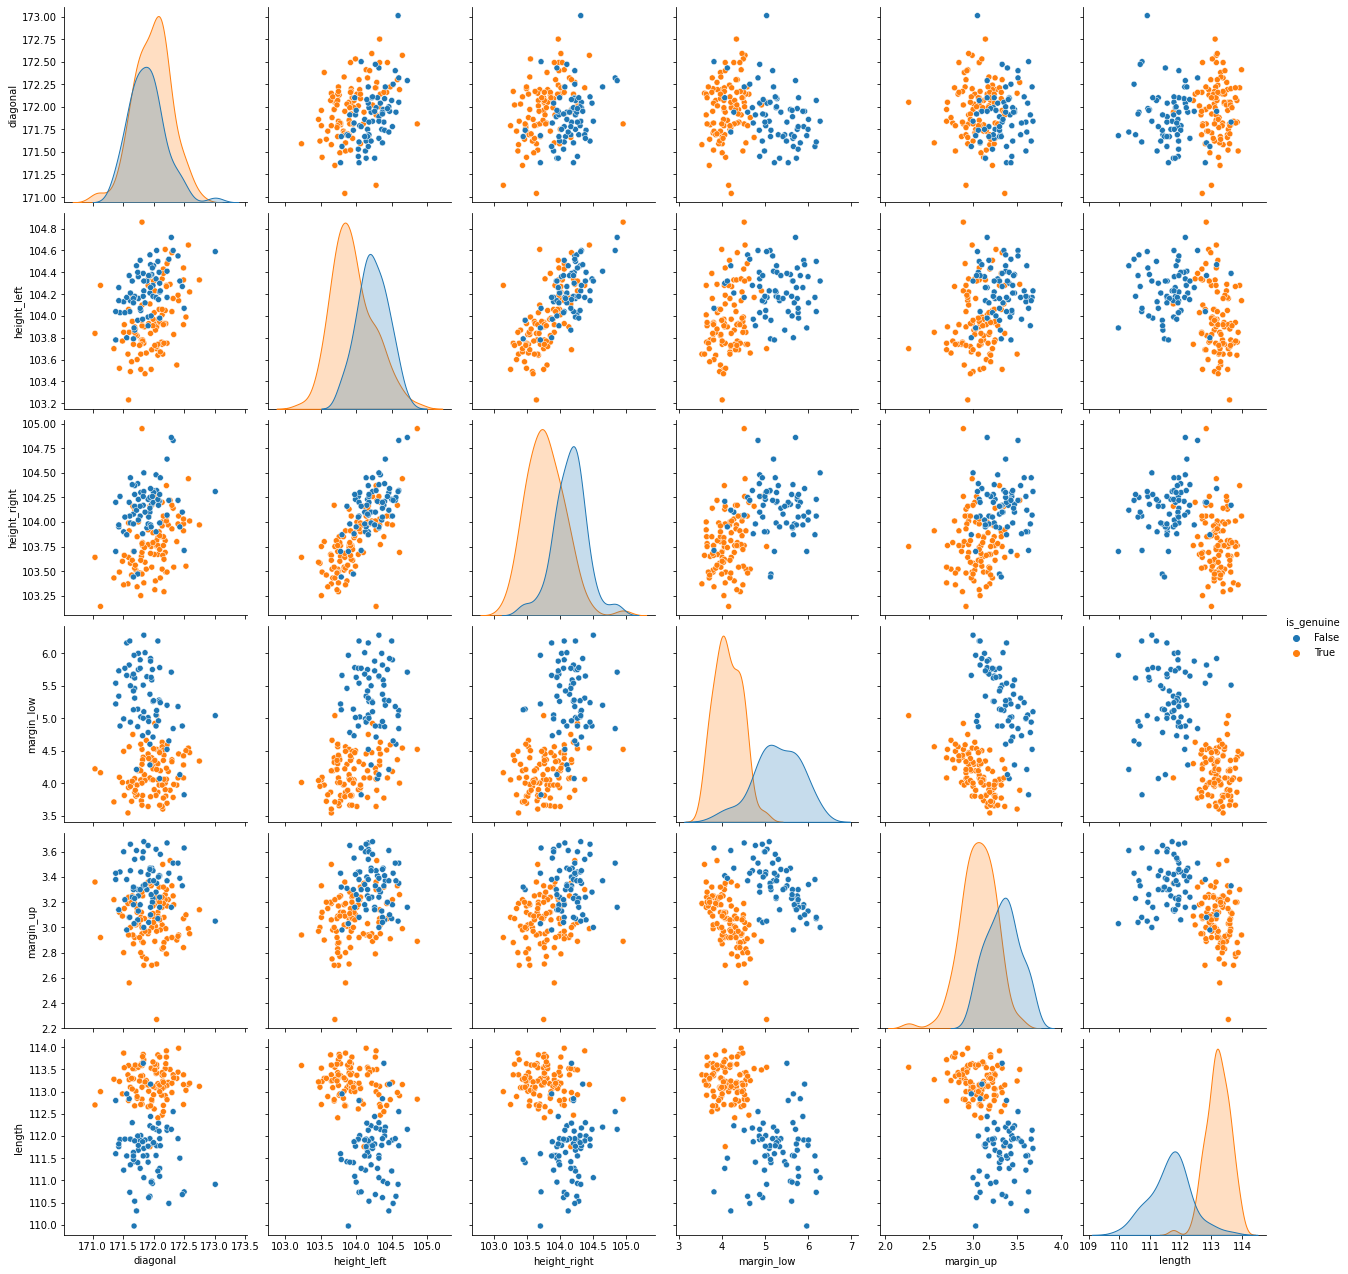

In [19]:
sns.pairplot(cash_df, hue='is_genuine', height=3)
plt.show()

### Observations

Les memes observations constatés dans la partie "Bivariate Analaysis"

## Partie 2 : ANALYSE EN COMPOSANTES PRINCIPALES

Repartez de l'exploration via l'étude VISA pour cette partie + le cours sur OC
Dans tous les cas, je veux voir ce que j'ai cité plus haut.

### 1. Standardization

In [20]:
cash_fltd = cash_df.drop('is_genuine', axis=1)

In [21]:
X_std = StandardScaler().fit_transform(cash_fltd)
X_std

array([[-0.42834385,  2.6694537 ,  3.09656321, -0.13159013, -1.18987367,
         0.28163308],
       [-0.88755932, -1.09769709, -0.69125444, -0.86012554, -1.27473985,
         0.78069736],
       [-0.36274164, -1.03042654, -0.50943919, -0.30301023, -1.23230676,
         1.37740465],
       ...,
       [ 1.73652911,  0.68497248,  0.52084721,  0.38267015,  0.67718214,
        -2.05094997],
       [-0.39554274, -0.32408577, -0.1458087 ,  0.16839504,  1.61071005,
        -0.75989238],
       [ 0.06367273, -0.22317994,  0.06630909,  1.45404575,  0.38015054,
        -1.74717171]])

### 2. Eigen decomposition — Computing Eigenvectors and Eigenvalues

#### 2.1 Covariance Matrix

In [22]:
print('Covariance matrix \n')
cov_mat= np.cov(X_std, rowvar=False)
cov_mat

Covariance matrix 



array([[ 1.00591716,  0.32147482,  0.22172226, -0.18209153, -0.02752747,
         0.0807703 ],
       [ 0.32147482,  1.00591716,  0.73873577,  0.42704205,  0.32670946,
        -0.42388076],
       [ 0.22172226,  0.73873577,  1.00591716,  0.5123893 ,  0.36908899,
        -0.41948814],
       [-0.18209153,  0.42704205,  0.5123893 ,  1.00591716,  0.17212533,
        -0.641123  ],
       [-0.02752747,  0.32670946,  0.36908899,  0.17212533,  1.00591716,
        -0.52839204],
       [ 0.0807703 , -0.42388076, -0.41948814, -0.641123  , -0.52839204,
         1.00591716]])

#### 2.2 Eigenvectors and Eigenvalues computation from the covariance matrix

In [23]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.07327499  0.77963908  0.08889419 -0.55973158  0.22509444 -0.12216606]
 [ 0.47550205  0.33925019 -0.12276016  0.2780463  -0.71592059 -0.23213146]
 [ 0.4918214   0.23554253 -0.15383022  0.45893794  0.48699285  0.4808135 ]
 [ 0.43102671 -0.32053699 -0.5128076  -0.22652773  0.31190784 -0.54763041]
 [ 0.35253984 -0.14111974  0.82114881  0.13533955  0.1939426  -0.35437971]
 [-0.46537288  0.31453645 -0.12691346  0.57370304  0.25441684 -0.52395111]]

Eigenvalues 
[2.86372065 1.32522178 0.85912514 0.51460481 0.27840703 0.19442354]


### 3. Principal Components

#### 3.1 Sorting PCs

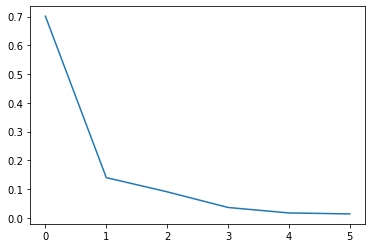

In [43]:
# defining pca
pca = PCA()
C = pca.fit(cash_fltd).transform(cash_fltd)

# sorting eigenvalues
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()

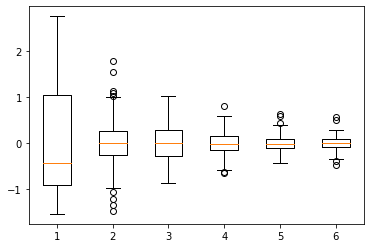

In [25]:
# PC Box plot
plt.figure()
plt.boxplot(C)
plt.show()

#### 3.2 Explained Variance

In [26]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("\n Variance percentage of the first three principal components\n ",var_exp[0:3])
print("\n Total variance percentage of the first three principal components\n",sum(var_exp[0:3]))


 Variance percentage of the first three principal components
  [47.447920578848205, 21.957105962434866, 14.234524326721642]

 Total variance percentage of the first three principal components
 83.6395508680047


### 4. Individuals distribution

#### 4.2 PC1 vs PC2 individuals projection

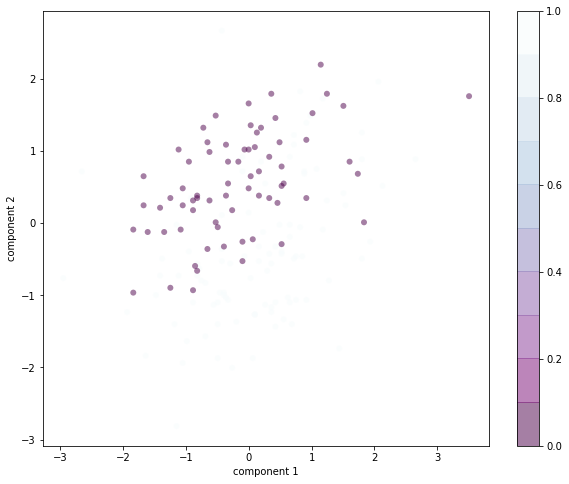

In [36]:
fig = plt.figure(figsize=(10,8))
plt.scatter(X_std[:, 0], X_std[:, 1],
            c=cash_df.is_genuine, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('BuPu_r', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

#### 4.3 PC1 vs PC3 individuals projection

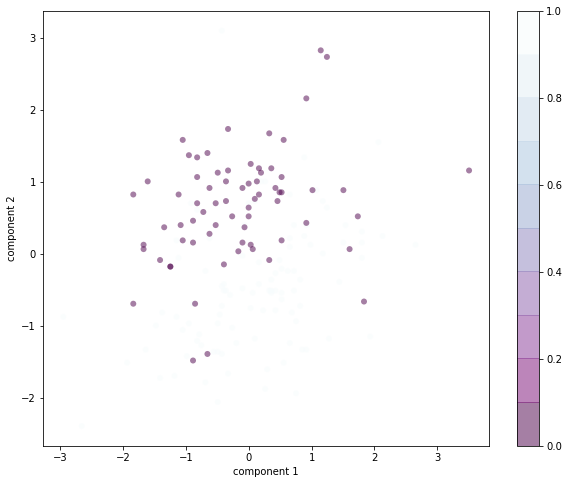

In [58]:
fig = plt.figure(figsize=(10,8))
plt.scatter(X_std[:, 0], X_std[:, 2],
            c=cash_df.is_genuine, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('BuPu_r', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### 5. Cercle des corrélations

#### 5.1 PC1 vs PC2 correlation cercle

In [47]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.



 Variance percentage of the first principal component
  47.447920578848205

 Variance percentage of the second principal component
  21.957105962434866


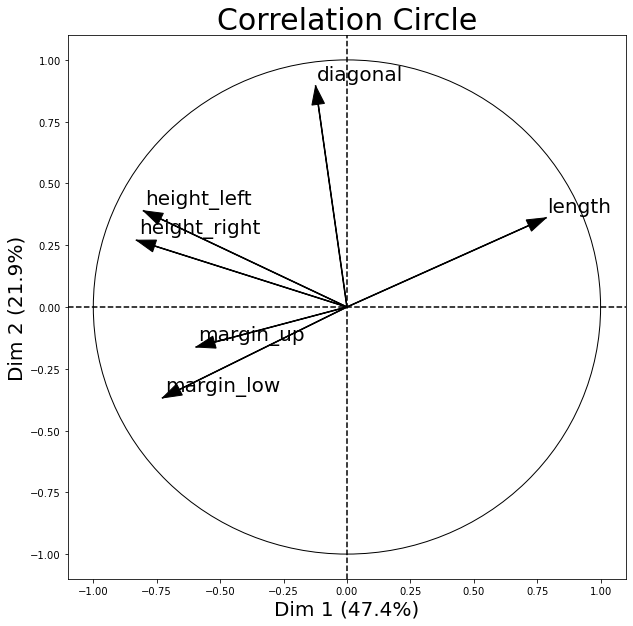

In [65]:
from mlxtend.plotting import plot_pca_correlation_graph

print("\n Variance percentage of the first principal component\n ",var_exp[0])
print("\n Variance percentage of the second principal component\n ",var_exp[1])
figure, correlation_matrix = plot_pca_correlation_graph(X_std,
                                                        cash_fltd.columns,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)

#### 5.2 PC1 vs PC3 correlation cercle


 Variance percentage of the first principal component
  47.447920578848205

 Variance percentage of the third principal component
  14.234524326721642


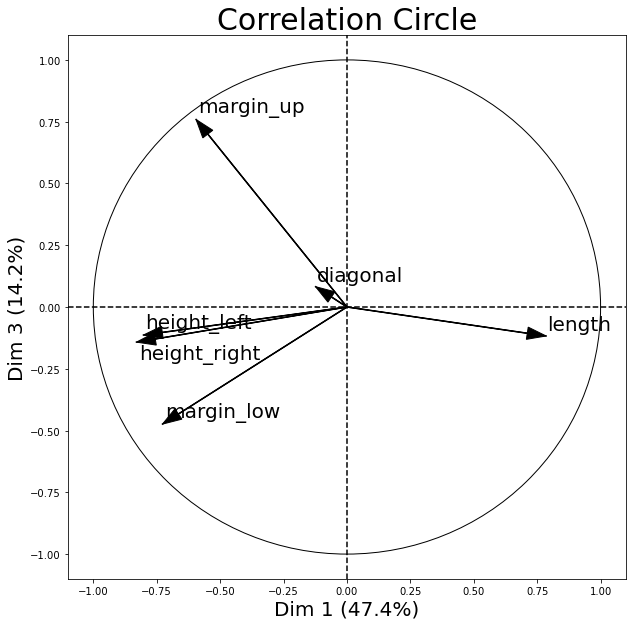

In [57]:
print("\n Variance percentage of the first principal component\n ",var_exp[0])
print("\n Variance percentage of the third principal component\n ",var_exp[2])
figure, correlation_matrix = plot_pca_correlation_graph(X_std,
                                                        cash_fltd.columns,
                                                        dimensions=(1, 3),
                                                        figure_axis_size=10)

## Observations

### Choix du nombre des composantes

On a choisi 3 composants principaux puique ils regroupent le 83% des instances de données (individus)

 ### Représentation des variables par le cercle

En correlant les deux premiers composants principaux, on constate comme la longueur du billet est représenté par le composant 1 (PC1), alors que la diagonal de ce dernier est représenté par le composant 2 (PC2)

En revanche, en correlant le premier et le troisieme composants, on constate comme la longueur du billet est représenté par le composant 1 (PC1), alors que le "margin_up" (la marge entre le bord supérieur du billet et l’image de celui-ci) de ce dernier est représenté par le composant 2 (PC2)

### Représentation des individus par les plans factoriels

Repartion omogene des individus en correlant le PC1 et le PC2

### Analyse de la qualité de représentation et la contribution des individus

La classification des billets est majoritairement caracterisé par la correlation entre la longueur et la diagonale de ces derniers.

## Partie 3 : PREDICTION

Effectuer la prédiction de nouveaux billets via un algorithme que vous allez mettre en place (kmeans? regression logistique? A vous de voir).

### Raw features vs PCs Logistic Regression

Comparer les metrics du model avec les features standard du data set et le model avec les trois composants principaux